#Capstone Project

###This notebook will be mainly used for the capstone project.

In [1]:
import numpy as np
import pandas as pd

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


#Introduction

###This notebook will cover the capstone project which is a part of the Data Science Certificate courses. The course concentrates on identifying a business problem and use the dataset to give a model that predicts the factor of interest to the business.

#Business problem

###The business is interested in predicting the severity of car accidents that happen under different circumstances. This prediction can help in notifying drivers to drive more carefully or even change their go out plans to avoid getting into these accidents.

#Data understanding

###The dataset that will be used for building the predicting model is taken from the Seattle Police Department and it has all collisions that were recorded from 2004 to present.

In [3]:
SeattleCity_DF = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
SeattleCity_DF.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
SeattleCity_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

###Since our main interest is to predict the severity of accidents, we will pick the attributes that describe how bad the car accident is like the human fatality, traffic delay, property damage, or any other type of accident bad impact. Below are the list of attributes that we analyze and pick from to train our model:

In [6]:
CarAccidentsBySPD_DF = SeattleCity_DF[['SEVERITYCODE','ADDRTYPE','WEATHER','SPEEDING','ROADCOND','VEHCOUNT','PERSONCOUNT']]

In [7]:
CarAccidentsBySPD_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 7 columns):
SEVERITYCODE    194673 non-null int64
ADDRTYPE        192747 non-null object
WEATHER         189592 non-null object
SPEEDING        9333 non-null object
ROADCOND        189661 non-null object
VEHCOUNT        194673 non-null int64
PERSONCOUNT     194673 non-null int64
dtypes: int64(3), object(4)
memory usage: 10.4+ MB


In [8]:
CarAccidentsBySPD_DF['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

###Speed is having more than 185k missing records, and its missing values can't be predicted since the most frequent value is NaN and the rest of the values is Yes. For this reason, we will exclude this attribute from our analysis.

In [9]:
CarAccidentsBySPD_DF.drop('SPEEDING', axis = 1, inplace = True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
CarAccidentsBySPD_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 6 columns):
SEVERITYCODE    194673 non-null int64
ADDRTYPE        192747 non-null object
WEATHER         189592 non-null object
ROADCOND        189661 non-null object
VEHCOUNT        194673 non-null int64
PERSONCOUNT     194673 non-null int64
dtypes: int64(3), object(3)
memory usage: 8.9+ MB


###We have missing values in WEATHER, ROADCON, and ADDRTYPE columns. In order to cover up these missing values, we need to either fill the missing with the most frequent value in the dataset or drop these values from the dataset. In this Analysis, I will go with dropping the values.

In [11]:

CarAccidentsBySPD_DF = CarAccidentsBySPD_DF[~CarAccidentsBySPD_DF['WEATHER'].isnull()]
CarAccidentsBySPD_DF = CarAccidentsBySPD_DF[~CarAccidentsBySPD_DF['ROADCOND'].isnull()]
CarAccidentsBySPD_DF = CarAccidentsBySPD_DF[~CarAccidentsBySPD_DF['ADDRTYPE'].isnull()]

In [12]:
CarAccidentsBySPD_DF['WEATHER'].value_counts()

Clear                       110607
Raining                      33000
Overcast                     27572
Unknown                      14096
Snowing                        902
Other                          796
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [13]:
CarAccidentsBySPD_DF['ROADCOND'].value_counts()

Dry               123867
Wet                47256
Unknown            14043
Ice                 1193
Snow/Slush           995
Other                125
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

In [14]:
CarAccidentsBySPD_DF['ADDRTYPE'].value_counts()

Block           123481
Intersection     63504
Alley              742
Name: ADDRTYPE, dtype: int64

###Road condition and weather columns, have the value Unknown which can't be useful in predicting the severity of accidents. The best option is to drop the unknown values for both columns

In [15]:
CarAccidentsBySPD_DF = CarAccidentsBySPD_DF[CarAccidentsBySPD_DF['ROADCOND'] != 'Unknown']
CarAccidentsBySPD_DF = CarAccidentsBySPD_DF[CarAccidentsBySPD_DF['WEATHER'] != 'Unknown']

In [16]:
CarAccidentsBySPD_DF['ROADCOND'].value_counts()

Dry               123044
Wet                46830
Ice                 1122
Snow/Slush           905
Other                111
Standing Water       104
Sand/Mud/Dirt         65
Oil                   61
Name: ROADCOND, dtype: int64

In [17]:
CarAccidentsBySPD_DF['WEATHER'].value_counts()

Clear                       110127
Raining                      32962
Overcast                     27233
Snowing                        894
Fog/Smog/Smoke                 556
Other                          280
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               48
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

###Checking the dataset again.

In [18]:
CarAccidentsBySPD_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172242 entries, 0 to 194672
Data columns (total 6 columns):
SEVERITYCODE    172242 non-null int64
ADDRTYPE        172242 non-null object
WEATHER         172242 non-null object
ROADCOND        172242 non-null object
VEHCOUNT        172242 non-null int64
PERSONCOUNT     172242 non-null int64
dtypes: int64(3), object(3)
memory usage: 9.2+ MB


###Now the dataset is ready for analysis.

#Visual data analysis

In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frequency of vechile counts in accidents')

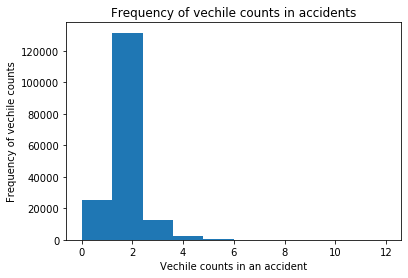

In [20]:
plt.hist(CarAccidentsBySPD_DF.VEHCOUNT)
plt.xlabel('Vechile counts in an accident')
plt.ylabel('Frequency of vechile counts')
plt.title('Frequency of vechile counts in accidents')

In [21]:

CarAccidentsBySPD_DF.VEHCOUNT.value_counts()

2     131484
1      24789
3      12650
4       2382
5        522
0        193
6        143
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

###Will change the xlim to provide clearer representation for the distribution.

Text(0.5, 1.0, 'Frequency of vechile counts in accidents')

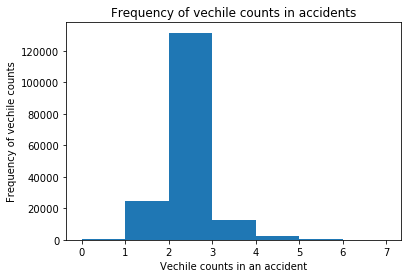

In [22]:

bins = np.arange(CarAccidentsBySPD_DF.PERSONCOUNT.min(), 8, 1)
plt.hist(CarAccidentsBySPD_DF.VEHCOUNT,bins = bins)
plt.xlabel('Vechile counts in an accident')
plt.ylabel('Frequency of vechile counts')
plt.title('Frequency of vechile counts in accidents')

Text(0.5, 1.0, 'Frequency of people count in accidents')

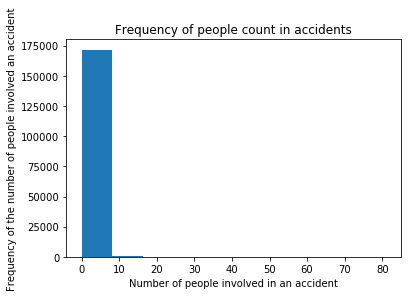

In [23]:
plt.hist(CarAccidentsBySPD_DF.PERSONCOUNT)
plt.xlabel('Number of people involved in an accident')
plt.ylabel('Frequency of the number of people involved an accident')
plt.title('Frequency of people count in accidents')

In [24]:
CarAccidentsBySPD_DF.PERSONCOUNT.value_counts()

2     95947
3     34189
4     14214
1     11182
5      6493
0      5321
6      2673
7      1118
8       528
9       213
10      128
11       55
12       33
13       21
14       19
15       11
17       11
16        8
44        6
18        6
20        6
25        6
19        5
26        4
22        4
27        3
28        3
29        3
47        3
32        3
34        3
37        3
23        2
21        2
24        2
30        2
36        2
57        1
31        1
35        1
39        1
41        1
43        1
48        1
53        1
54        1
81        1
Name: PERSONCOUNT, dtype: int64

###Will change the xlim to provide clearer representation for the distribution.

Text(0.5, 1.0, 'Frequency of people count in accidents')

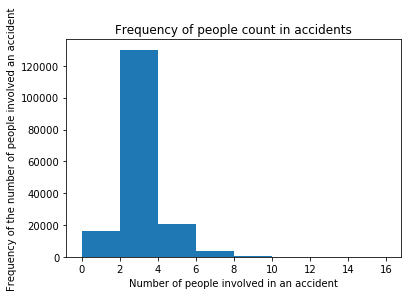

In [25]:
bins = np.arange(CarAccidentsBySPD_DF.PERSONCOUNT.min(), 17, 2)
plt.hist(CarAccidentsBySPD_DF.PERSONCOUNT,bins = bins)
plt.xlabel('Number of people involved in an accident')
plt.ylabel('Frequency of the number of people involved an accident')
plt.title('Frequency of people count in accidents')

Text(0.5, 1.0, 'Number of accedints based on Address type')

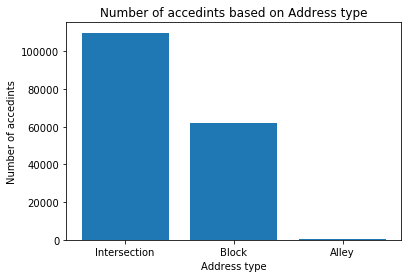

In [26]:
X = CarAccidentsBySPD_DF.ADDRTYPE.unique()
Data = CarAccidentsBySPD_DF.ADDRTYPE.value_counts()
plt.bar(X,height=Data)
plt.xlabel('Address type')
plt.ylabel('Number of accedints')
plt.title('Number of accedints based on Address type')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

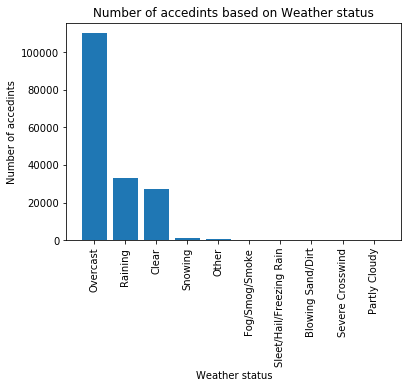

In [27]:

X = CarAccidentsBySPD_DF.WEATHER.unique()
Data = CarAccidentsBySPD_DF.WEATHER.value_counts()
plt.bar(X,height=Data)
plt.xlabel('Weather status')
plt.ylabel('Number of accedints')
plt.title('Number of accedints based on Weather status')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

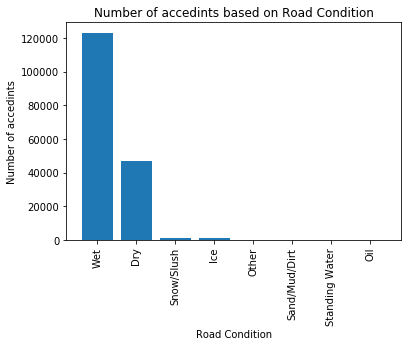

In [28]:
X = CarAccidentsBySPD_DF.ROADCOND.unique()
Data = CarAccidentsBySPD_DF.ROADCOND.value_counts()
plt.bar(X,height=Data)
plt.xlabel('Road Condition')
plt.ylabel('Number of accedints')
plt.title('Number of accedints based on Road Condition')
plt.xticks(rotation = 90)

In [29]:
import seaborn as sns

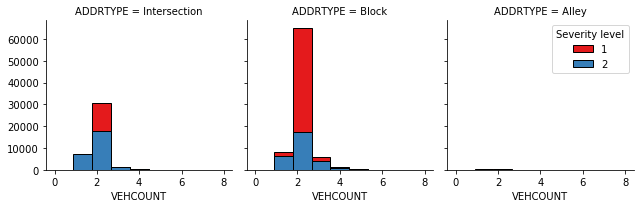

In [30]:
bins = np.linspace(CarAccidentsBySPD_DF.VEHCOUNT.min(), 8, 10)
g = sns.FacetGrid(CarAccidentsBySPD_DF, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=3)
g.map(plt.hist, 'VEHCOUNT', bins=bins ,ec="k")
g.axes[-1].legend(title="Severity level")
plt.show()

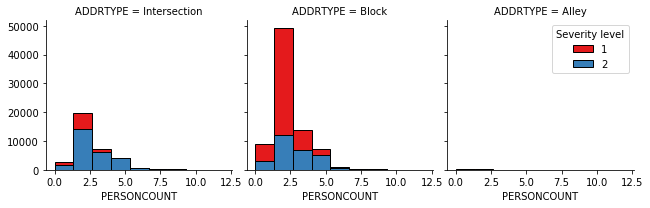

In [31]:
bins = np.linspace(CarAccidentsBySPD_DF.PERSONCOUNT.min(), 12, 10)
g = sns.FacetGrid(CarAccidentsBySPD_DF, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=3)
g.map(plt.hist, 'PERSONCOUNT', bins=bins ,ec="k")
g.axes[-1].legend(title="Severity level")
plt.show()

#Converting categorical features to numerical features

In [32]:
CarAccidentsBySPD_DF = pd.concat([CarAccidentsBySPD_DF,pd.get_dummies(CarAccidentsBySPD_DF['ADDRTYPE'])], axis=1)
CarAccidentsBySPD_DF = pd.concat([CarAccidentsBySPD_DF,pd.get_dummies(CarAccidentsBySPD_DF['WEATHER'])], axis=1)
CarAccidentsBySPD_DF = pd.concat([CarAccidentsBySPD_DF,pd.get_dummies(CarAccidentsBySPD_DF['ROADCOND'])], axis=1)

In [33]:
CarAccidentsBySPD_DF.drop(['ADDRTYPE','WEATHER','ROADCOND'],axis=1,inplace = True)

In [34]:

CarAccidentsBySPD_DF_X = CarAccidentsBySPD_DF.drop('SEVERITYCODE',axis=1)
CarAccidentsBySPD_DF_Y = CarAccidentsBySPD_DF['SEVERITYCODE'].values

In [35]:
CarAccidentsBySPD_DF_X

,VEHCOUNT,PERSONCOUNT,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,...,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,2,2,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,4,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,3,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2,2,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,2,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,3,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2,2,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,2,2,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
CarAccidentsBySPD_DF_Y

array([2, 1, 1, ..., 2, 2, 1])